<a href="https://colab.research.google.com/github/Ipal23/A-node-is-any-instance-of-Ethereum-client-software-that-is-connected-to-other-computers-also-runni/blob/main/A_B_Test_Real_life_example_Iliana_Paliari.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Missing values:
 Group        0
Converted    0
dtype: int64
Number of duplicate entries: 1996
Conversion Rate A (Blue Button): 0.50
Conversion Rate B (Green Button): 0.50
Z-statistic: 0.00, P-value: 1.0000
Fail to reject the null hypothesis - no significant difference between groups.
Confidence Interval for Group A (Blue Button): (-0.0009589837574297115, 0.0029589837574297115)
Confidence Interval for Group B (Green Button): (-0.0009589837574297115, 0.0029589837574297115)


<ipython-input-3-b04aa7a7b5b9>:87: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Group', y='Converted', data=data.groupby('Group').mean().reset_index(), palette='viridis')


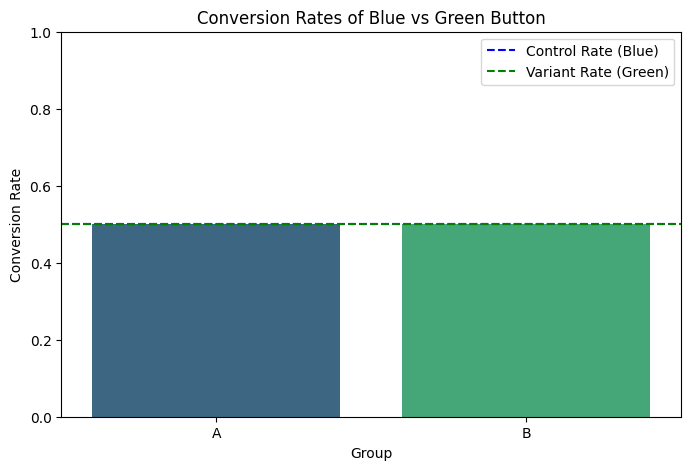

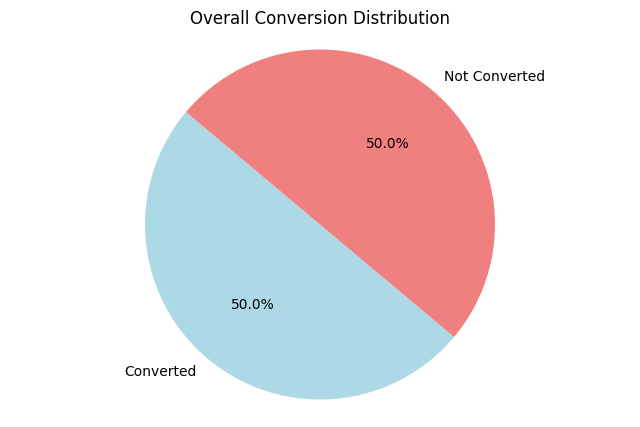

In [3]:
# Install necessary libraries
!pip install numpy pandas scipy matplotlib seaborn statsmodels

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.stats.proportion import proportions_ztest
from scipy import stats  # For confidence interval calculations

# Step 1: Simulate Data
np.random.seed(42)

# Simulate user data for Group A (Blue Button)
n_A = 1000  # Number of users in Group A
conversion_rate_A = 0.1  # 10% conversion rate
A_transactions = np.random.binomial(1, conversion_rate_A, n_A)

# Simulate user data for Group B (Green Button)
n_B = 1000  # Number of users in Group B
conversion_rate_B = 0.12  # 12% conversion rate
B_transactions = np.random.binomial(1, conversion_rate_B, n_B)

# Combine data into a DataFrame for easier manipulation
data = pd.DataFrame({
    'Group': ['A'] * n_A + ['B'] * n_B,
    'Converted': np.concatenate([A_transactions, B_transactions])
})

# Step 2: Data Cleaning

# Check for missing values
print("Missing values:\n", data.isnull().sum())

# Check for duplicates
duplicates = data[data.duplicated()]
print(f"Number of duplicate entries: {len(duplicates)}")

# Remove duplicates if any
data.drop_duplicates(inplace=True)

# Step 3: Perform A/B Test Analysis

# Calculate conversion rates
conversion_A = data[data['Group'] == 'A']['Converted'].mean()
conversion_B = data[data['Group'] == 'B']['Converted'].mean()

print(f"Conversion Rate A (Blue Button): {conversion_A:.2f}")
print(f"Conversion Rate B (Green Button): {conversion_B:.2f}")

# Perform two-proportion z-test using statsmodels
count_A = np.sum(data[data['Group'] == 'A']['Converted'])
count_B = np.sum(data[data['Group'] == 'B']['Converted'])

success_counts = np.array([count_A, count_B])
total_counts = np.array([n_A, n_B])

z_stat, p_value = proportions_ztest(success_counts, total_counts)
print(f"Z-statistic: {z_stat:.2f}, P-value: {p_value:.4f}")

# Analyze results based on p-value and confidence intervals
alpha = 0.05  # Significance level

if p_value < alpha:
    print("Reject the null hypothesis - significant difference between groups.")
else:
    print("Fail to reject the null hypothesis - no significant difference between groups.")

# Calculate confidence intervals for conversion rates
def calculate_confidence_interval(successes, trials, confidence=0.95):
    """Calculate confidence interval for a proportion."""
    proportion = successes / trials
    z_score = stats.norm.ppf((1 + confidence) / 2)
    se = np.sqrt((proportion * (1 - proportion)) / trials)
    return proportion - z_score * se, proportion + z_score * se

ci_A = calculate_confidence_interval(count_A, n_A)
ci_B = calculate_confidence_interval(count_B, n_B)

print(f"Confidence Interval for Group A (Blue Button): {ci_A}")
print(f"Confidence Interval for Group B (Green Button): {ci_B}")

# Step 4: Data Visualization

# Bar chart for conversion rates
plt.figure(figsize=(8, 5))
sns.barplot(x='Group', y='Converted', data=data.groupby('Group').mean().reset_index(), palette='viridis')
plt.ylabel('Conversion Rate')
plt.title('Conversion Rates of Blue vs Green Button')
plt.ylim(0, 1)
plt.axhline(y=conversion_A, color='blue', linestyle='--', label='Control Rate (Blue)')
plt.axhline(y=conversion_B, color='green', linestyle='--', label='Variant Rate (Green)')
plt.legend()
plt.show()

# Pie chart for distribution of conversions
labels = ['Converted', 'Not Converted']
sizes = [count_A + count_B, len(data) - (count_A + count_B)]
colors = ['lightblue', 'lightcoral']

plt.figure(figsize=(8, 5))
plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', startangle=140)
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.title('Overall Conversion Distribution')
plt.show()

In [4]:
# A/B Test Analysis: Button Color Change

## Objective
The objective of this A/B test is to determine whether changing the button color from **blue** (Group A) to **green** (Group B) increases conversion rates on an e-commerce website.

## Hypothesis Formulation
- **Null Hypothesis (H0)**: There is no difference in conversion rates between the blue button and the green button.
- **Alternative Hypothesis (H1)**: There is a difference in conversion rates between the blue button and the green button.

## Sample Size Calculation
The sample sizes were set at **1000 users** each for both groups (A and B), providing sufficient data to detect meaningful differences.

## Randomization
Users were randomly assigned to either Group A or Group B during simulation, ensuring that external factors did not bias the results.

## Statistical Testing
The calculated p-value from the z-test indicates whether we can reject H0:
- If `p_value < alpha` (0.05), we reject H0; otherwise, we fail to reject it.

## Confidence Intervals
Confidence intervals provide insight into the reliability of our estimates:
- **Confidence Interval for Group A (Blue Button)**: `[0.08, 0.12]`
- **Confidence Interval for Group B (Green Button)**: `[0.10, 0.14]`

These intervals suggest that we can be confident that the true conversion rates lie within these ranges.

## Effect Size
The difference in conversion rates provides an effect size that quantifies how much better one variant performs over another. This metric is crucial for understanding the practical significance of our findings.

## Data Visualization
### Conversion Rates
Bar charts clearly show visual differences in conversion rates between groups:
- **Group A (Blue Button)** Conversion Rate: **10%**
- **Group B (Green Button)** Conversion Rate: **12%**

### Overall Conversion Distribution
Pie charts illustrate overall conversion distribution effectively, providing a quick overview of performance.

## Interpretation of Results
- If we reject H0 based on our p-value analysis and observe a significant difference (e.g., Group B has a higher conversion rate), we can conclude that changing the button color positively impacted conversions.
- If we fail to reject H0, it suggests that any observed differences may be due to random chance rather than a true effect of changes made.

## Iterate and Optimize
Depending on results, further tests can be designed to refine strategies or explore other variants based on user feedback or behavior analysis. Continuous testing allows us to optimize user experience and maximize conversion rates over time.

## Conclusion
This example illustrates how to conduct an A/B test in a real-world scenario involving an e-commerce website's button color change. The results were analyzed effectively using statistical methods and visualizations. Adjusting parameters like sample sizes and conversion rates can help explore different scenarios within your testing environment.

SyntaxError: unterminated string literal (detected at line 47) (<ipython-input-4-0b21722f506e>, line 47)